In [2]:
import scipy as sp
import scipy.optimize
import pandas as pd
import scipy.stats
import iminuit
import probfit
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import IPython
import statsmodels.api as sm
import dill

In [1]:
%load_ext ipycache

/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/fabian/anaconda2/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
pool = multiprocessing.Pool()

NameError: name 'multiprocessing' is not defined

In [5]:
time = {}
lf = {}
time['4B'] = [2.29354, 2.28859, 2.10544, 2.26508, 9.66216, 9.50087, 9.50417, 9.36804, 16.9177, 16.954, 16.9606, 16.9701, 30.7825, 30.5948, 30.7603, 30.752, 49.6176, 49.6304, 49.6399, 49.6465, 98.6136, 98.786, 123.359, 123.363, 123.366]
lf['4B'] = [0.627451, 0.598039, 0.509804, 0.458333, 0.409314, 0.45098, 0.470588, 0.661765, 0.519608, 0.735294, 0.77451, 0.830882, 0.89951, 0.784314, 0.767157, 0.718137, 0.811275, 0.887255, 0.943627, 0.982843, 0.928922, 0.953431, 0.955882, 0.980392, 1.00]

time['4D'] = [2.29815, 2.12762, 2.29115, 2.28703, 9.67458, 9.50198, 9.48921, 16.8941, 16.8776, 17.0386, 30.6422, 30.6368, 30.788, 49.3113, 49.4521, 49.5967, 98.4965, 98.4923, 98.4886, 122.865, 122.861, 122.858]
lf['4D'] = [0.32598, 0.340686, 0.367647, 0.392157, 0.436275, 0.463235, 0.539216, 0.480392, 0.578431, 0.620098, 0.678922, 0.710784, 0.811275, 0.598039, 0.759804, 0.89951, 0.946078, 0.970588, 0.992647, 0.955882, 0.97549, 0.997549]

time['5B'] = [1.93289, 1.93289, 1.93289, 1.93289, 9.50336, 9.50336, 9.34228, 9.34228, 16.9128, 16.9128, 17.0738, 16.9128, 16.9128, 28.349, 28.349, 28.349, 53.9597, 53.7987, 53.7987, 76.349, 76.349, 76.349, 104.376, 104.376, 104.376]
lf['5B'] = [0.197044, 0.26601, 0.300493, 0.371921, 0.330049, 0.317734, 0.29803, 0.268473, 0.256158, 0.29803, 0.344828, 0.364532, 0.421182, 0.41133, 0.396552, 0.325123, 0.748768, 0.711823, 0.687192, 0.448276, 0.497537, 0.524631, 0.566502, 0.761084, 0.859606]

time ['5D'] = [1.93809, 1.93809, 2.0996, 9.52894, 9.52894, 9.52894, 9.52894, 16.9583, 16.9583, 16.9583, 17.1198, 16.9583, 28.5868, 28.5868, 28.7483, 28.5868, 53.9435, 53.9435, 53.9435, 53.9435, 76.5545, 76.393, 76.5545, 104.657, 104.657, 104.495]
lf['5D'] = [0.130181, 0.253032, 0.275141, 0.144768, 0.169338, 0.18408, 0.220935, 0.210955, 0.240439, 0.274837, 0.292033, 0.390316, 0.205803, 0.230373, 0.308994, 0.490815, 0.335505, 0.352704, 0.438699, 0.522237, 0.298187, 0.34733, 0.41858, 0.263213, 0.282869, 0.35904]

colors = {'4B': 'blue',
          '4D': 'green',
          '5B': 'red',
          '5D': 'magenta'}

In [6]:
IDs = []
times = []
lfs = []

for ID in time:
    IDs += len(time[ID]) * [ID]
    times += time[ID]
    lfs += lf[ID]
    
lf_data = pd.DataFrame({'ID': IDs, 'time': times, 'labeling_fraction': lfs})

In [7]:
filters = [[0, 4,  {'4B', '4D', '5D', '5B'} ],
           [4, 12, {'4B', '4D', '5D', '5B'} ],
           [13, 18, {'4B', '4D', '5D', '5B'}],
           [28, 32, {'4B', '4D'}],
           [48, 52, {'4B', '4D'}],
           [95, 100, {'4B', '4D'}],
           [120, 125, {'4B', '4D'}],
           [26, 32, {'5B', '5D'}],
           [52, 55, {'5B', '5D'}],
           [75, 78, {'5B', '5D'}],
           [102, 106, {'5B', '5D'}],
           ]

In [8]:
for filter_ in filters:
    lf_data.loc[(lf_data['time'] < filter_[1]) & (lf_data['time'] > filter_[0]) & ([ID in filter_[2] for ID in lf_data['ID']]), 'time'] = \
        sp.around(2 * lf_data.loc[(lf_data['time'] < filter_[1]) & (lf_data['time'] > filter_[0]) & ([ID in filter_[2] for ID in lf_data['ID']]), 'time'].mean()) / 2
lf_data = lf_data.set_index('ID')    

In [9]:
lf_data['time'].unique()

array([   2. ,    9.5,   17. ,   28.5,   54. ,   76.5,  104.5,   30.5,
         49.5,   98.5,  123. ])

In [10]:
lf_data_for_mean = lf_data.reset_index().groupby(['ID', 'time']).filter(lambda x: len(x) > 2)
lf_data_mean = lf_data_for_mean.reset_index().groupby(['ID', 'time']).agg(['mean', 'std', 'sem', 'count']).reset_index().set_index('ID')

/home/fabian/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


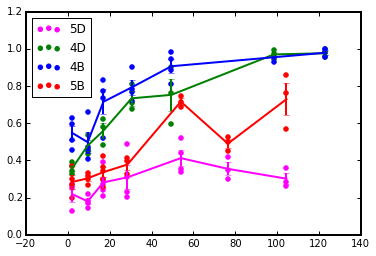

In [11]:
for ID in lf_data.index.unique():
    cscatterdata = lf_data.loc[ID]
    cmeandata = lf_data_mean.loc[ID]
    plt.scatter(cscatterdata['time'], cscatterdata['labeling_fraction'], label = ID, color = colors[ID])
    plt.errorbar(cmeandata['time'], cmeandata['labeling_fraction', 'mean'], cmeandata['labeling_fraction', 'sem'], color = colors[ID])
    

plt.legend(loc=0)
plt.show()    

In [12]:
def brdu_model(t, TS, TC, TG2M, r, GF):
    """ BrdU-labeling fraction model for BrdU incorporation in vivo.
        Based on Lefevre et al., 2013 and extended with an initial
        growth fraction.
        
        t    ... time after start of BrdU labeling
        TS   ... length of S-Phase
        TC   ... cell cycle length
        TG2M ... combined length of G2- and M-Phase
        r    ... mean number of daughter cells after cell division remaining
                 in the population
        GF   ... initial growth fraction
        
        Lefevre, J., Marshall, D. J., Combes, A. N., Ju, A. L., Little, M. H.
        & Hamilton, N. A. (2013). Modelling cell turnover in a complex tissue
        during development. Journal of Theoretical Biology, 338, 66-79.
    """
    
    if TS + TG2M > TC:
        return sp.nan
    else:
        if r==1:
            if t < TC - TS:
                return GF * (t + TS) / TC
            else:
                return GF
        else:
            # calculate the growth fraction at time t
            g = ( ( GF * r ** (t / TC) ) / ( GF * r ** (t / TC) + (1 - GF) ) )
            if t < TG2M:
                return  g * ((r ** ( ( TG2M + TS ) / TC ) - r ** (( TG2M - t ) / TC) ) / (r - 1.0) )
            elif t < TC - TS:
                return g * (1.0 - ( r ** ( ( TC + TG2M - t ) / TC ) - r ** ( ( TG2M  + TS) / TC ) ) / (r - 1.0) )
            else:
                return g

In [13]:
def nowakowski_model(time, TS, TC, GF):
    xp = [0, TC - TS]
    yp = [GF * TS / TC, GF]
    return sp.interp(time, xp, yp, left = None, right = None)

In [14]:
def coord_to_cycle(Y0, X1, Y1):
    TC = X1 / (1 - Y0)
    TS = TC * Y0
    return 

In [33]:
sp.optimize.brute?

In [34]:
sp.optimize.minimize?

Bootstrapping

In [15]:
def fit_model(data, Ns):
    def chi2(x, data = data):
        rTS, TC, GF = x
        TS = rTS * TC
        x = sp.array(data['time'])
        y = sp.array(data['labeling_fraction'])
        return probfit.costfunc.Chi2Regression(nowakowski_model, x, y)(TS, TC, GF)
    
    x0 = sp.optimize.brute(chi2, [(0.0, 1.0), (20.0, 200.0), (0.0, 1.0)], Ns = Ns)
#     x0 = sp.optimize.basinhopping(chi2, [0.5, 100.0, 0.5])
    return {'TS': x0[0] * x0[1], 'TC': x0[1], 'GF': x0[2]}    

In [16]:
def plot_fit(data, res):
    fig, ax = plt.subplots()
    plt.scatter(data['time'], data['labeling_fraction'])
    time = sp.linspace(0, 125, 100)
    plt.plot(time, nowakowski_model(time, **res.mean()))
    return fig, ax

In [17]:
def bootstrap(data, N, Ns):
    resampled_datasets = [data.sample(frac=1.0, replace=True) for i in range(N)]
    
    def fit_model_pool_map(data):
        return fit_model(data, Ns)
    results = map(fit_model_pool_map, resampled_datasets)
    
    return pd.DataFrame(results)

[Skipped the cell's code and loaded variables res from file '/home/fabian/ownCloud/Vincent_Rost_Brusch_and_Tanaka_BMC/BrdU/bootstrap.pkl'.]


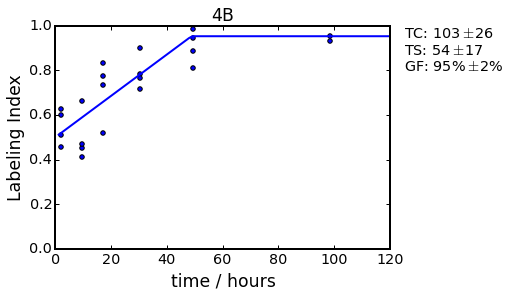

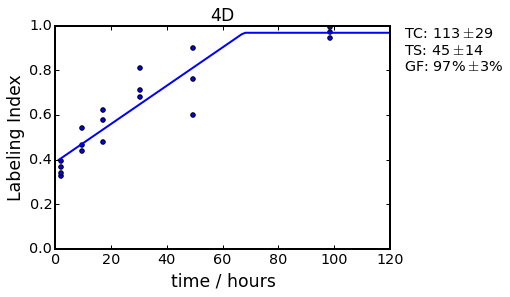

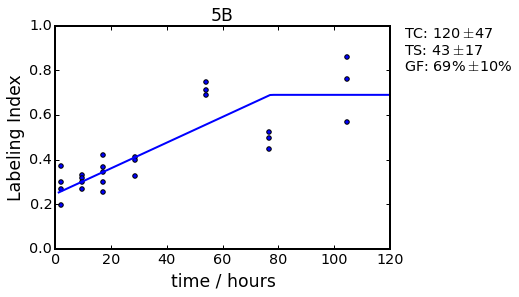

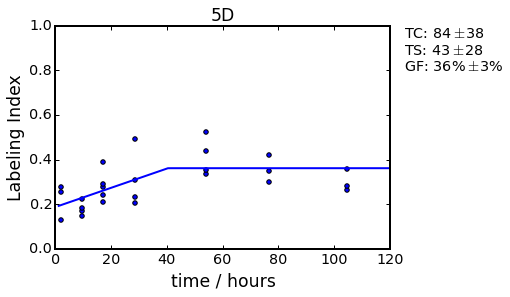

CPU times: user 6.64 ms, sys: 0 ns, total: 6.64 ms
Wall time: 6.34 ms


In [19]:
%%time 
%%cache -r bootstrap.pkl res 
N = 10000 
Ns = 10 

res = {}

for ID, data in lf_data.groupby(level='ID'):
    res[ID] = bootstrap(data, N, Ns)
    summary = res[ID].groupby(lambda x: 0).agg(['mean', 'std'])
    GF, GF_delta, TC, TC_delta, TS, TS_delta = summary.loc[0]
#     IPython.display.display(summary)
    
    
    fig, ax = plot_fit(data, res[ID])
    ax.set_title(ID, fontsize = 'xx-large')
    
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 1)
    
    ax.set_xlabel('time / hours', fontsize = 'xx-large')
    ax.set_ylabel('Labeling Index', fontsize = 'xx-large')
    
    ax.tick_params(labelsize = 'x-large')
    
    summarytext = "TC: {0:.0f}$\pm${1:.0f}\nTS: {2:.0f}$\pm${3:.0f}\nGF: {4:.0f}%$\pm${5:.0f}%".format(TC, TC_delta, TS, TS_delta, 100*GF, 100*GF_delta)
    
    ax.text(125, 0.8, summarytext, fontsize = 'x-large')
    
    plt.show()

In [21]:
diff

,std,0.15,99.95,99.85,0.05,97.5,2.5,mean
0,0.03724,0.375982,0.711473,0.689877,0.299881,0.659473,0.516356,0.606698


In [37]:
Nd = int(1e5)
pairs = [('4B', '4D'), ('5B', '5D'), ('4B', '5B'), ('4D', '5D')]
for pair in pairs:
    print('Comparing {0} and {1}'.format(pair[0], pair[1]))
    for parameter in ['TC', 'TS', 'GF']:
        a = res[pair[0]][parameter]
        b = res[pair[1]][parameter]
        
        diff = abs(a.mean() - b.mean())
#         sigma = sp.sqrt(a.std()**2 + b.std()**2 )
        sigma = a.std() + b.std()
        
        if diff - 3 * sigma > 0:
            s2 = '**'
        elif diff - 2 * sigma > 0:
            s2 = '*'
        else:
            s2 = ''
        
        print('{} difference: {} +- {}  {}'.format(parameter, diff, sigma, s2))

        diff = (a.sample(n=Nd, replace=True).reset_index(drop=True) - b.sample(n=Nd, replace=True).reset_index(drop=True))\
               .groupby(lambda x: 0).agg({'mean': 'mean',
                                          'std': 'std',
                                          '2.5': lambda x: sp.percentile(x, 2.5),
                                          '97.5': lambda x: sp.percentile(x, 97.5),
                                          '0.15': lambda x: sp.percentile(x, 0.15),
                                          '99.85': lambda x: sp.percentile(x, 99.85),
                                          '0.05': lambda x: sp.percentile(x, 0.05),
                                          '99.95': lambda x: sp.percentile(x, 99.95),})
        s3 = '*' if diff.loc[0, '2.5'] > 0 or diff.loc[0, '97.5'] < 0 else ''
        
        print('{} difference (p<0.05) : {:.3g} [{:.3g}, {:.3g}] {}'.format(parameter,\
                                                                 float(diff['mean']),\
                                                              float(diff['2.5']),\
                                                              float(diff['97.5']),\
                                                                 s3))
        s4 = '*' if diff.loc[0, '0.15'] > 0 or diff.loc[0, '99.85'] < 0 else ''
        print('{} difference (p<0.003): {:.3g} [{:.3g}, {:.3g}] {}'.format(parameter,\
                                                                 float(diff['mean']),\
                                                              float(diff['0.15']),\
                                                              float(diff['99.85']),\
                                                                 s4))
        s4 = '*' if diff.loc[0, '0.05'] > 0 or diff.loc[0, '99.95'] < 0 else ''
        print('{} difference (p<0.001): {:.3g} [{:.3g}, {:.3g}] {}'.format(parameter,\
                                                                 float(diff['mean']),\
                                                              float(diff['0.05']),\
                                                              float(diff['99.95']),\
                                                                 s4))

Comparing 4B and 4D
TC difference: 10.055119453 +- 54.4134057098  
TC difference (p<0.05) : -10.1 [-89.2, 62.4] 
TC difference (p<0.003): -10.1 [-135, 100] 
TC difference (p<0.001): -10.1 [-149, 123] 
TS difference: 8.71834050516 +- 31.7685271287  
TS difference (p<0.05) : 8.67 [-36.9, 52.2] 
TS difference (p<0.003): 8.67 [-67.6, 83] 
TS difference (p<0.001): 8.67 [-80.8, 112] 
GF difference: 0.01547234011 +- 0.0496674285222  
GF difference (p<0.05) : -0.0153 [-0.0797, 0.0697] 
GF difference (p<0.003): -0.0153 [-0.124, 0.195] 
GF difference (p<0.001): -0.0153 [-0.151, 0.22] 
Comparing 5B and 5D
TC difference: 35.8911082758 +- 85.4146078934  
TC difference (p<0.05) : 35.8 [-68.5, 155] 
TC difference (p<0.003): 35.8 [-152, 185] 
TC difference (p<0.001): 35.8 [-211, 193] 
TS difference: 0.812046502793 +- 44.9814716415  
TS difference (p<0.05) : -1 [-69.3, 56.9] 
TS difference (p<0.003): -1 [-153, 85.4] 
TS difference (p<0.001): -1 [-199, 96.2] 
GF difference: 0.328624331712 +- 0.124745949

Todo: Symmetric Model

## Exports for Lutz

BrdU fit estimates

In [26]:
export_res = pd.concat([r.groupby(lambda x: condition).agg(['mean', 'std']) for condition, r in sorted(res.items())])
export_res.to_excel('cell_cycle_parameters.xlsx')
export_res

GF                    TC                    TS           
        mean       std        mean        std       mean        std
4B  0.952413  0.023870  102.731060  25.842655  53.870944  17.315950
4D  0.967886  0.025798  112.786180  28.570750  45.152603  14.452577
5B  0.689749  0.097870  119.695872  47.209029  42.551538  17.423977
5D  0.361125  0.026876   83.804764  38.205579  43.363584  27.557495

In [ ]:
for ID, data in lf_data.groupby(level='ID'):
    data.to_excel('brdu_data_{}.xlsx'.format(ID))

In [ ]:
for ID, data in res.items():
    export_timecourse = pd.DataFrame()
    export_timecourse['time'] = sp.linspace(0, 150, 200)
    export_timecourse['labeling_fraction'] = nowakowski_model(export_timecourse['time'], **data.mean())
    export_timecourse.to_excel('brdu_model_prediciton_{}.xlsx'.format(ID))